# Coursework 1 - Bike rental

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

from scipy.stats import f_oneway

pd.options.display.max_rows = 250

### Reading the data 

In [2]:
days = pd.read_csv("day.csv")
year_2011 = days.loc[days["yr"]==0]
year_2012 = days.loc[days["yr"]==1]

In [13]:
days


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [12]:
days["yr"].replace(2011,0, inplace=True)

In [10]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Here two variables for 2011 and 2012 were created because these will be used constantly in the project. 

## Task 1 

For this task pandas.DataFrame functions were used to make the calculations in one line of code to save up space.

First DataFrame.groupby() function which is appropriate to form groups from the dataset based on set criteria and appply directly computational operations to this group without the need of further splitting up the dataset. 

Second, DataFrame.mean() function was used becasue this can be applied directly to the group formed from the DataFrame. As this function returns a Series, pandas Series.to_frame() function was used to convert it to a DataFrame. 

### 1.1 Average daily counts for 2011 and 2012 across days per month

In [131]:
average_daily_counts = days.groupby(["yr","mnth"])["cnt"].mean().to_frame()
average_daily_counts

cnt
yr mnth             
0  1     1231.903226
   2     1721.964286
   3     2065.967742
   4     3162.333333
   5     4381.322581
   6     4783.733333
   7     4559.387097
   8     4409.387097
   9     4247.266667
   10    3984.225806
   11    3405.566667
   12    2816.870968
1  1     3120.774194
   2     3556.448276
   3     5318.548387
   4     5807.466667
   5     6318.225806
   6     6761.000000
   7     6567.967742
   8     6919.451613
   9     7285.766667
   10    6414.225806
   11    5088.800000
   12    3990.741935

##### *Explanation*

The DataFrame above shows the average daily bike rentals for 2011(0) and 2012(1). It is interesting that in 2011 the month with the highest count was the 6, but in 2012 it was the month 9. 

### 1.2 Average monthly counts for 2011 and 2012 across months per season

In [143]:
average_monthly_counts = days.groupby(["yr","season"])["cnt"].mean().to_frame()
average_monthly_counts

cnt
yr season             
0  1       1666.666667
   2       3775.173913
   3       4464.361702
   4       3664.460674
1  1       3531.296703
   2       6209.489130
   3       6824.244681
   4       5791.865169

##### *Explanation*

The DataFrame shows the average monthly bike rentals per season for 2011(0) and 2012(1). In both years season 3 has the highest bike rental count.

## Task 2

Here the groupby() and mean() functions from pandas.DataFrame were used for the same reasons as in Task 1.

However, becasue there was a need to make a further calculation (subtracting one year from the other to get the difference) pandas.DataFrame() function was used to convert the Series given by the .mean() function into a DataFrame. The subtraction was implemented in the pd.DataFrame() function itself.   

### 2.1 DataFrame showing the difference between the average counts of each month in 2011 and 2012.

In [5]:
year_2011_monthly_mean = year_2011.groupby(["mnth"])["cnt"].mean()
year_2012_monthly_mean = year_2012.groupby(["mnth"])["cnt"].mean()

df_difference_monthly = pd.DataFrame(year_2011_monthly_mean-year_2012_monthly_mean)
df_difference_monthly

cnt
mnth             
1    -1888.870968
2    -1834.483990
3    -3252.580645
4    -2645.133333
5    -1936.903226
6    -1977.266667
7    -2008.580645
8    -2510.064516
9    -3038.500000
10   -2430.000000
11   -1683.233333
12   -1173.870968

## Task 3 

Similarly to the previous tasks the groupby() function was used in order to be able to apply other functions directly to the DataFrame.

The .sum() function counts all users given the set criteria into a Series.

Using the sort_values() function the Series is first set that the lowest is on the top and then the head() function makes sure to show only one row.  

### 3.1 The season with highest count of bike rentals in 2011 

Both for casual and registered users season 3 had the highest count of bike rentals in 2011. 

In [6]:
year_2011.groupby(["season"])["casual"].sum().sort_values(ascending= False).head(1)

season
3    95450
Name: casual, dtype: int64

In [7]:
year_2011.groupby(["season"])["registered"].sum().sort_values(ascending= False).head(1)

season
3    324200
Name: registered, dtype: int64

### 3.2 The season with highest count of bike rentals in 2012

Similarly to 2012, both for casual and registered users season 3 had the highest count of bike rentals in 2012. 

In [8]:
year_2012.groupby(["season"])["casual"].sum().sort_values(ascending= False).head(1)

season
3    130641
Name: casual, dtype: int64

In [9]:
year_2012.groupby(["season"])["registered"].sum().sort_values(ascending= False).head(1)

season
3    510838
Name: registered, dtype: int64

## Task 4 

### 4.1 Top 3 months with the lowest count of bike rentals for *casual* users

In 2011, for casual users the top 3 lowest months were 1,2,12 and in 2012 the top 3 were month 1,2,3. 

In [10]:
year_2011.groupby(["mnth"])["casual"].sum().sort_values(ascending=True).head(3)

mnth
1     3073
2     6242
12    8448
Name: casual, dtype: int64

In [11]:
year_2012.groupby(["mnth"])["casual"].sum().sort_values(ascending=True).head(3)

mnth
2      8721
1      8969
12    13245
Name: casual, dtype: int64

### 4.2 Top 3 months with the lowest count of bike rentals for *registered* users

In 2011, for registered users the top 3 lowest months were 1,2,3 and in 2012 the months 1,2,12.

In [12]:
year_2011.groupby(["mnth"])["registered"].sum().sort_values(ascending=True).head(3)

mnth
1    35116
2    41973
3    51219
Name: registered, dtype: int64

In [35]:
year_2012.groupby(["mnth"])["registered"].sum().sort_values(ascending=True).head(3)

mnth
1      87775
2      94416
12    110468
Name: registered, dtype: int64

## Task 5 

Here pandas DataFrame.plot.bar() function was used instead of seaborn library barplots or similar to visualise the distribution. 

The reason is that seaborn.barplot shows the mean values of the y-axis and it was more appropriate to show the total bike rentals. 

### 5.1 Year-wise distribution of rental bike counts

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Total counts (in millions)'),
 Text(0.5, 1.0, 'Figure 1 Year-wise total distribution of counts')]

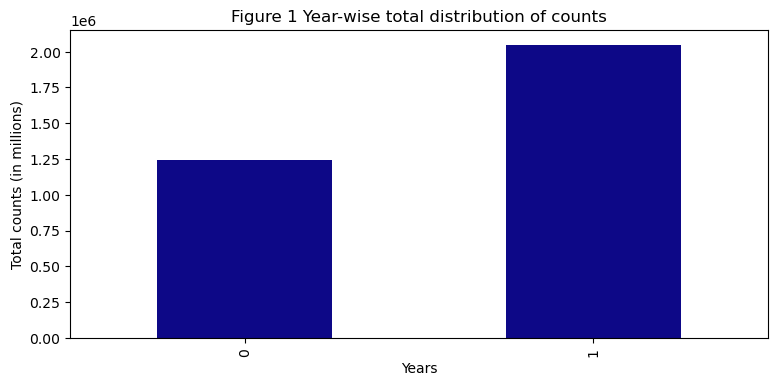

In [36]:
years_cnt = days.groupby(["yr"])["cnt"].sum()
years_cnt_df = pd.DataFrame(years_cnt)

barplot_years= years_cnt_df.plot.bar(figsize=(9,4),colormap="plasma",legend=False)
barplot_years.set(xlabel="Years", ylabel="Total counts (in millions)",title = "Figure 1 Year-wise total distribution of counts")

##### *Explanation*

Figure 1 shows the distribution of all bike rentals for both years. In 2012 (1) a significantly higher number of bike rentals were accounted for than in 2011 (0).

### 5.2 Workingday-wise distribution of counts

[Text(0.5, 1.0, 'Year 2012'),
 Text(0, 0.5, 'Total counts (in millions)'),
 Text(0.5, 0, 'Workingday')]

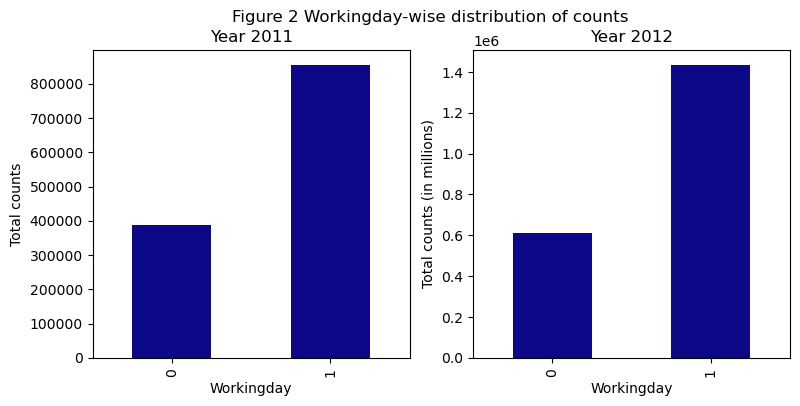

In [37]:
#creating dataFrames of specific criteria
workingday_cnt_2011 = year_2011.groupby("workingday")["cnt"].sum()
workingday_cnt_2011_df = pd.DataFrame(workingday_cnt_2011)
workingday_cnt_2012 = year_2012.groupby("workingday")["cnt"].sum()
workingday_cnt_2012_df = pd.DataFrame(workingday_cnt_2012)

#subplotting
fig,axes=plt.subplots(nrows=1,ncols=2,figsize = (9,4))
fig.suptitle("Figure 2 Workingday-wise distribution of counts")

#barplots
workingday_wise_2011 = workingday_cnt_2011_df.plot.bar(ax=axes[0],legend=False,colormap="plasma")
workingday_wise_2011.set(title = "Year 2011", ylabel = "Total counts", xlabel = "Workingday")

workingday_wise_2012 = workingday_cnt_2012_df.plot.bar(ax=axes[1],legend=False,colormap="plasma")
workingday_wise_2012.set(title = "Year 2012", ylabel = "Total counts (in millions)", xlabel ="Workingday")

##### *Explanation*

In Figure 2 it is visible that in both years there were notably more bike rentals on workingdays(1) than on weekends or holidays(0).

# Task 6

 https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot


*To calcualte the correlation 
plot the correlation coefficients seaborn.heatmap was used becasue it can coherently visualize the

https://eqibuana.medium.com/how-to-test-correlation-between-categorical-and-continuous-variables-in-data-science-95dca3704144

### 6.1 Correlation between wheather and bike rentals

In the dataset, the data for weather is in the range of 1-4. This data is categorical as it does not quantify the difference between each data point within the same interval. If two data points have the same value, e.g., value 2 (Cloudy) we cannot quantify whether one observation is cloudier than the other. 

As the dependent variable is the numerical (daily bike rental counts) and the independent variable is categorical, ANOVA was used to measure the association.


source: https://eqibuana.medium.com/how-to-test-correlation-between-categorical-and-continuous-variables-in-data-science-95dca3704144

### 6.1.1 Anova results:

scipy.stats.f_oneaway was used becasue it is less complicated library to do ANOVA than statsmodel.formula.api 

source: https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

In [38]:
anova_list = days.groupby("weathersit")["cnt"].apply(list)

result_ANOVA = f_oneway(*anova_list)
result_ANOVA[1]


3.106317270053755e-17

The P-value is 0.031 (<0.05) which means that there is a statistically significant association between the wheather and bike rental. 

Source: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0

### 6.1.2 Cathegorical Plot:

To visualise the association seaborn.swarmplot was used instead of seaborn.stripplot() as it can show the correlation between a numerical and cathegorical data without overlaps. 

spurce: https://seaborn.pydata.org/tutorial/categorical.html

[Text(0.5, 1.0, '2012'),
 Text(0.5, 0, 'Wheather'),
 Text(0, 0.5, 'Daily count of bike rentals')]

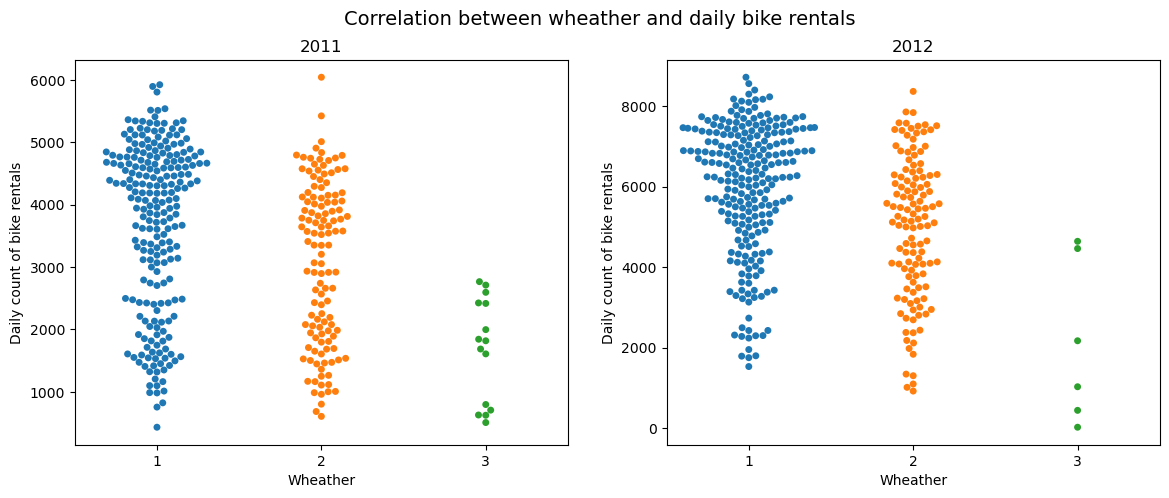

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize = (14,5))
fig.suptitle("Correlation between wheather and daily bike rentals",size=14)

catplot_weather_2011 = sns.swarmplot(ax = axes[0],data=year_2011,x="weathersit", y="cnt")
catplot_weather_2011.set(title="2011",xlabel="Wheather",ylabel="Daily count of bike rentals")

catplot_weather_2012 = sns.swarmplot(ax = axes[1],data=year_2012,x="weathersit", y="cnt")
catplot_weather_2012.set(title="2012",xlabel="Wheather",ylabel="Daily count of bike rentals")

##### Explanation:

The swarmplot above shows that there were higher bike rental counts during the days with "Clear" wheather (1) than during the "Cloudy","Rainy" days (2-3) for both 2011 and 2012. 

This further provides evidence that there is a correlation between wheather and bike rentals. 

### 5.2 Correlation to other environmental variables

The data for temperature, feeling temperature, humidity and windspeed is numerical, thus it is appropriate to calculate Pearson correlation coefficient. 

source: https://eqibuana.medium.com/how-to-test-correlation-between-categorical-and-continuous-variables-in-data-science-95dca3704144

### 5.2.1 Heatmaps


seaborn.heatmap was used to visualise the correlation coefficient coherently as it is easier to see which coefficient is higher or lower. 

source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

[Text(0.5, 1.0, '2012')]

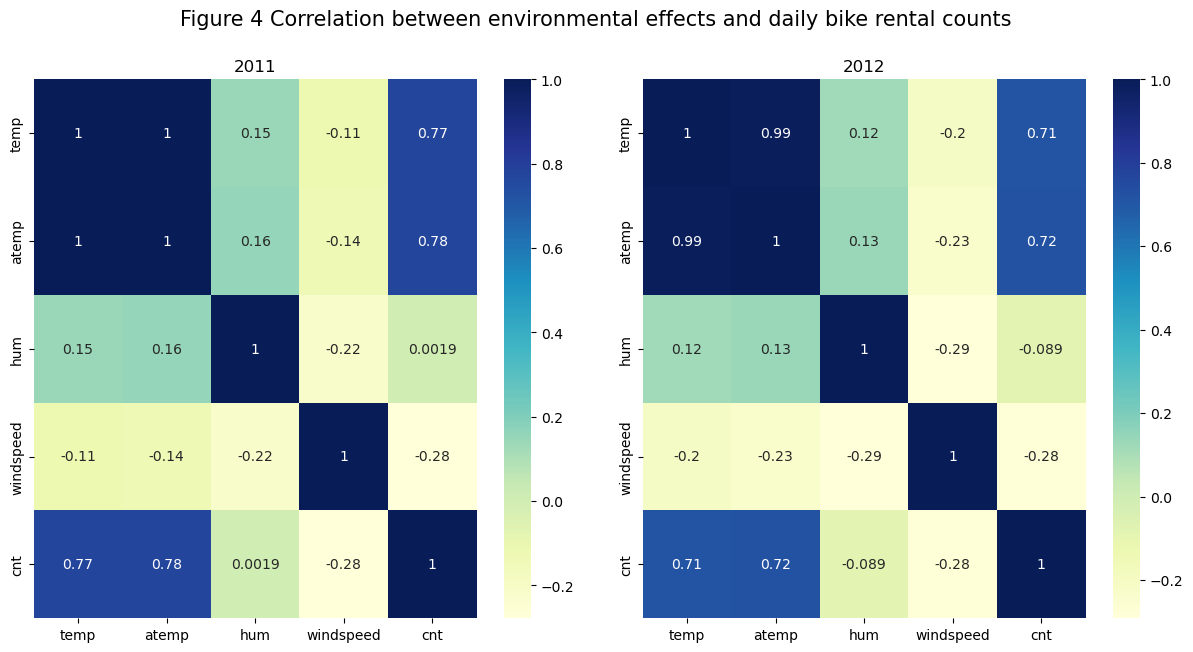

In [40]:
#Creating variables from the data
environ_cnt_2011 = year_2011[["temp","atemp","hum","windspeed","cnt"]]
environ_cnt_2012 = year_2012[["temp","atemp","hum","windspeed","cnt"]]

#creating the subplot
fig,(axes1,axes2)=plt.subplots(ncols=2,figsize = (15,7))
fig.subplots_adjust(wspace=0.1)
fig.suptitle("Figure 4 Correlation between environmental effects and daily bike rental counts",size=15)

heatmap_2011 = sns.heatmap(environ_cnt_2011.corr(method="pearson"),cmap="YlGnBu",annot = True,ax=axes1)
heatmap_2011.set(title="2011")

heatmap_2012 = sns.heatmap(environ_cnt_2012.corr(method="pearson"),cmap="YlGnBu",annot = True,ax=axes2)
heatmap_2012.set(title="2012")

##### Explanation:

The heatmap (Figure 4) above shows that there is a strong positive correlation between temperature, feeling temperature and daily bike rental counts. For both years the coefficient is higher than 0.71 which means that for 1 unit of increase in the temperature the daily bike rental count increases by a minimum of 0.71 units (and vice versa). This provides evidence to assume that there are more people renting bikes if the weather is warmer and fewer rentals when it is cold. 

Furthermore, there is a weak negative correlation between windspeed and bike rentals. The coefficient means that as the windspeed increases by 1 unit, there is a 0.28 drop in daily bike rental counts (and vice versa). 

However, the coefficient shows no association between humidity and bike rentals.


### 5.2.2 Regplots

To visualise the linear relationship seaborn.regplots were used instead of a basic seaborn.scatterplot. The reason is that it is easier to see the degree of relationship between the two variables using the regression line provided by the  regplot. 

[Text(0.5, 1.0, '2012'),
 Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Daily count of bike rentals')]

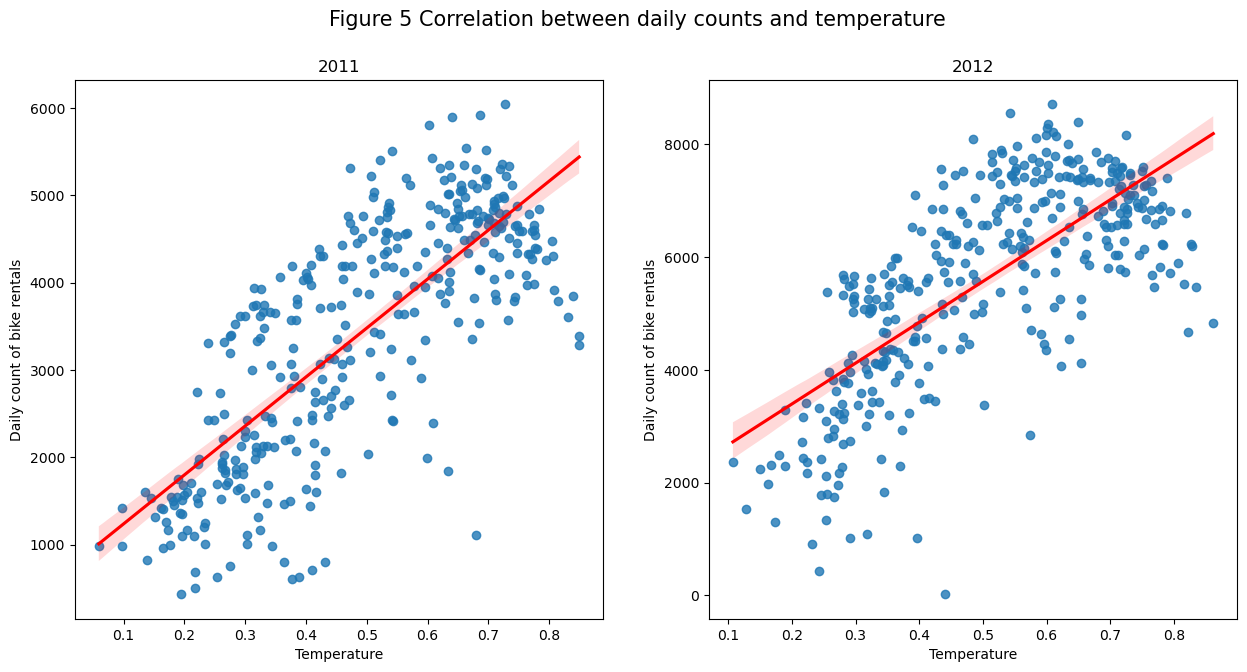

In [41]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize = (15,7))
fig.suptitle("Figure 5 Correlation between daily counts and temperature",size=15)

regplt_temp_2011 = sns.regplot(ax = axes[0],x="temp", y = "cnt", data = environ_cnt_2011,line_kws={"color":"red"})
regplt_temp_2011.set(title="2011", xlabel="Temperature", ylabel="Daily count of bike rentals")

regplt_temp_2012 = sns.regplot(ax = axes[1],x="temp", y = "cnt", data = environ_cnt_2012,line_kws={"color":"red"})
regplt_temp_2012.set(title="2012", xlabel="Temperature", ylabel="Daily count of bike rentals")

##### Explanation:

For both years the strong positive association is visible between the temperature and bike rentals is visible on Figure 5. 

[Text(0.5, 1.0, '2012'),
 Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Daily count of bike rentals')]

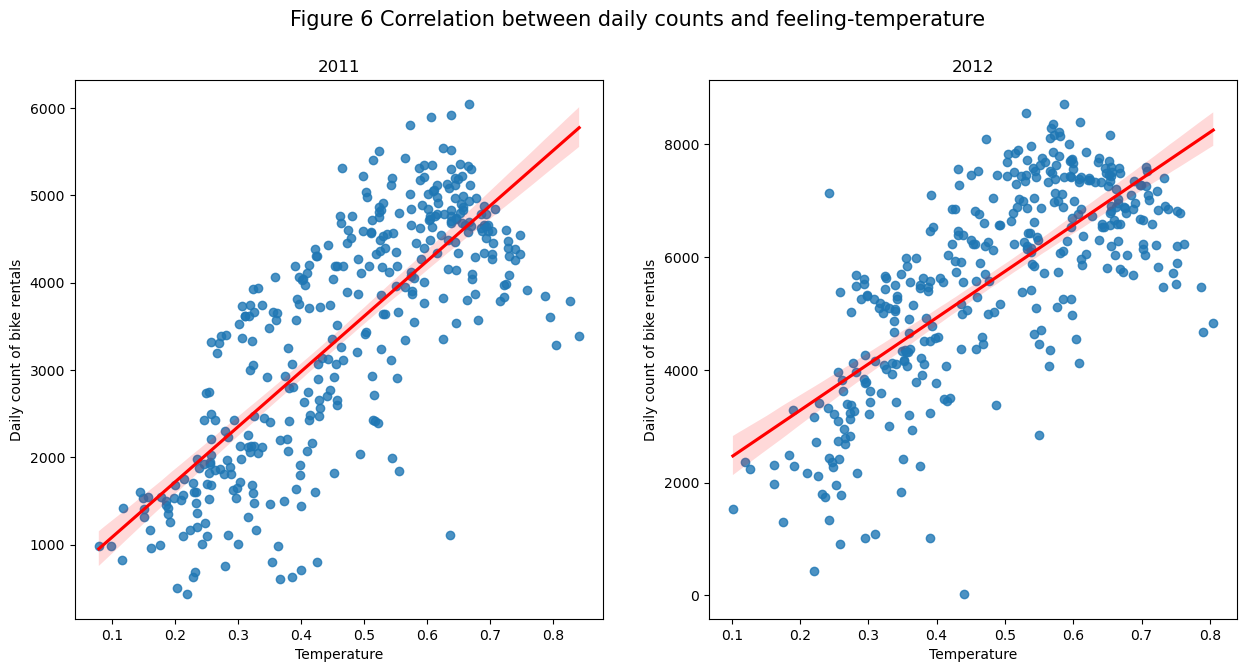

In [42]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize = (15,7))
fig.suptitle("Figure 6 Correlation between daily counts and feeling-temperature",size=15)

regplt_atemp_2011 = sns.regplot(ax = axes[0],x="atemp", y = "cnt", data = environ_cnt_2011,line_kws={"color":"red"})
regplt_atemp_2011.set(title="2011", xlabel="Temperature", ylabel="Daily count of bike rentals")

regplt_atemp_2012 = sns.regplot(ax = axes[1],x="atemp", y = "cnt", data = environ_cnt_2012,line_kws={"color":"red"})
regplt_atemp_2012.set(title="2012", xlabel="Temperature", ylabel="Daily count of bike rentals")

##### Explanation:

Similarly, on Figure 6 the strong positive correlation is evident between the feeling temperature and bike rentals. 

[Text(0.5, 1.0, '2012'),
 Text(0.5, 0, 'Humidity'),
 Text(0, 0.5, 'Daily count of bike rentals')]

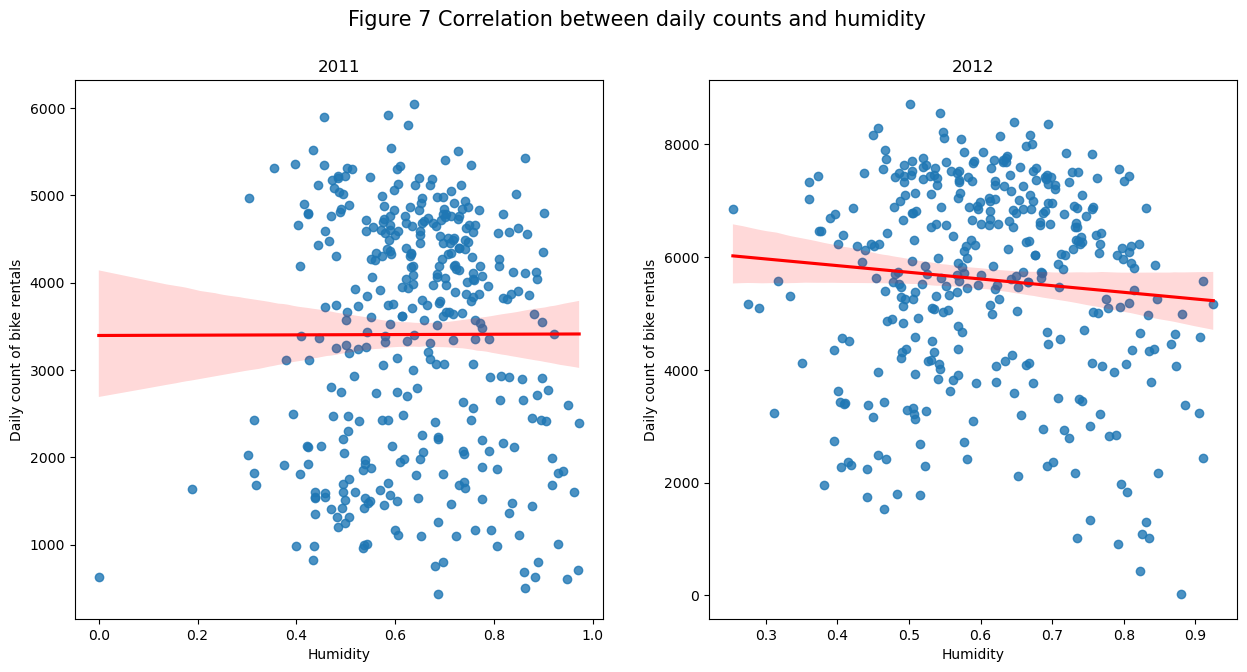

In [43]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize = (15,7))
fig.suptitle("Figure 7 Correlation between daily counts and humidity",size=15)

regplt_hum_2011 = sns.regplot(ax = axes[0],x="hum", y = "cnt", data = environ_cnt_2011,line_kws={"color":"red"})
regplt_hum_2011.set(title="2011", xlabel="Humidity", ylabel="Daily count of bike rentals")

regplt_hum_2012 = sns.regplot(ax = axes[1],x="hum", y = "cnt", data = environ_cnt_2012,line_kws={"color":"red"})
regplt_hum_2012.set(title="2012", xlabel="Humidity", ylabel="Daily count of bike rentals")

##### Explanation:

Figure 7 shows that there is no association between the humidity and bike rentals. 

[Text(0.5, 1.0, '2011'),
 Text(0.5, 0, 'Windspeed'),
 Text(0, 0.5, 'Daily count of bike rentals')]

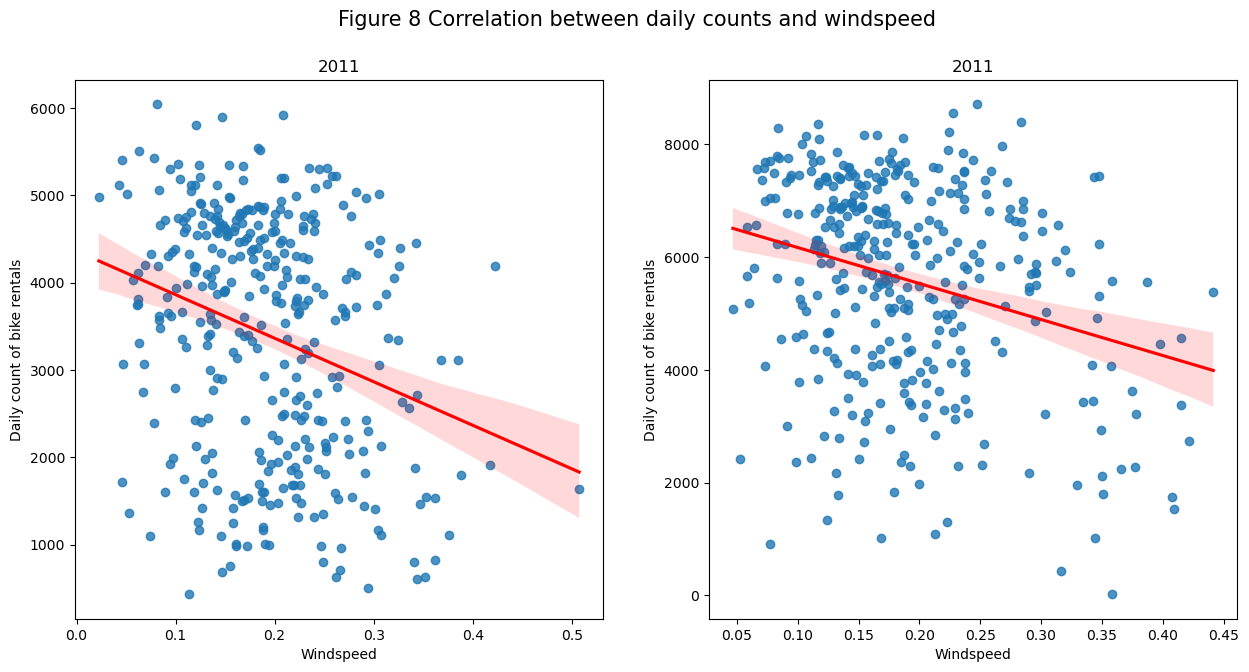

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize = (15,7))
fig.suptitle("Figure 8 Correlation between daily counts and windspeed",size=15)

regplt_windspeed_2011 = sns.regplot(ax = axes[0],x="windspeed", y = "cnt", data = environ_cnt_2011,line_kws={"color":"red"})
regplt_windspeed_2011.set(title="2011", xlabel="Windspeed", ylabel="Daily count of bike rentals")

regplt_windspeed_2012 = sns.regplot(ax = axes[1],x="windspeed", y = "cnt", data = environ_cnt_2012,line_kws={"color":"red"})
regplt_windspeed_2012.set(title="2011", xlabel="Windspeed", ylabel="Daily count of bike rentals")

##### Explanation:

The negative correlation is evident on Figure 8. However, there are significant number of outlier data points and the relationship is between windspeed and bike rentals is weak. 

## Task 7

In this task statsmodel.api was used because it can show in one model the R-squared and the p-value and the constant can be easily added unlike using scipy.stats.lineregress where the constant need to be calculated separately. 

source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### 7.1 Linear Regression Models

Feeling temperature, humidity, and windspeed have numerical values thus it is appropriate to use a Multiple Linear Regression model to predict the changes in bike rental counts explained by environmental effects.

Furthermore, as previously visualised using regplots, there is a high correlation between these environmental factors and bike rentals. 

Temperature ("temp") is excluded from the model due to multicollinearity. As the temperature is highly correlated to feeling temperature, only one variable was used. Otherwise, these variables used together would deteriorate the results. 

Using the basic kitchen sink method it was determined that the best model with the highest R-squared to predict the changes in bike rental counts is using feeling temperature, humidity and windspeed as independent variables.

source: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html

### 7.1.1 Year 2011

In [136]:
Y_2011 = year_2011["cnt"]
X_2011 = year_2011[["atemp","hum","windspeed"]]
X_2011 = sm.add_constant(X_2011)

stat = sm.OLS(Y_2011,X_2011)
stat_res = stat.fit()
stat_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     229.7
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.41e-83
Time:                        11:17:48   Log-Likelihood:                -2961.1
No. Observations:                 365   AIC:                             5930.
Df Residuals:                     361   BIC:                             5946.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2148.4073    263.250      8.161      0.000    1630.712    2666.103
atemp       6307.3178    256.573     24.583      0.000    5802.752    6811.883
hum        -1513.3260    295.458     -5.122      0.000   -2094.362    -932.290
windspeed  -3725.3923    569.922     -6.537      0.000   -4846.176   -2604.609
==============================================================================
Omnibus:                       12.917   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.302
Skew:                          -0.437   Prob(JB):                      0.00129
Kurtosis:                       3.335   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.1.2 Year 2012

In [139]:
Y_2012 = year_2012["cnt"]
X_2012 = year_2012[["atemp","hum","windspeed"]]
X_2012 = sm.add_constant(X_2012)

stat = sm.OLS(Y_2012,X_2012)
stat_res = stat.fit()
stat_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.78e-68
Time:                        11:20:32   Log-Likelihood:                -3099.7
No. Observations:                 366   AIC:                             6207.
Df Residuals:                     362   BIC:                             6223.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4428.8491    422.360     10.486      0.000    3598.261    5259.437
atemp       8098.2665    399.122     20.290      0.000    7313.377    8883.156
hum        -3166.8865    473.856     -6.683      0.000   -4098.743   -2235.030
windspeed  -4180.0400    828.708     -5.044      0.000   -5809.727   -2550.353
==============================================================================
Omnibus:                       11.258   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.596
Skew:                          -0.385   Prob(JB):                      0.00303
Kurtosis:                       3.409   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### *Explanation*

For Year 2011 the R-squared was 0.656 and for Year 2012 it was 0.583. Meaning, that the changes in the environmental effects can in 2011 explained 65.6% of the changes in bike rentals in 2011, and 58.3% in 2012. 

For both years the p-value is lower than 0.05 which means that the model is statistically significant. 

### 7.2 Prediction 

Previously, it was highlighted that for both years season 3 had the highest bike rentals and people are renting more bikes on the weekdays. 

It could be argued that the reason why weekdays have in total more rentals is becasue tehre are more weekdays in the year as holidays/weekends.

However, Figure 9 shows that in Season 3 there were more bike rentals during the week (day 4 and 3). 

Bike rental counts are highly correlated to the feeling temperature and weakly but correlated to windspeed. 

Therefore, based on these results and the regression model it can be predicted that during the weekdays in season 3 when the temperature is high and the windspeed is low, will be the highest count of bike rentals. 

[Text(0.5, 1.0, 'Figure 9 Season 3 higfhest bike rental counts'),
 Text(0.5, 0, 'Bike rental counts'),
 Text(0, 0.5, 'Weekday')]

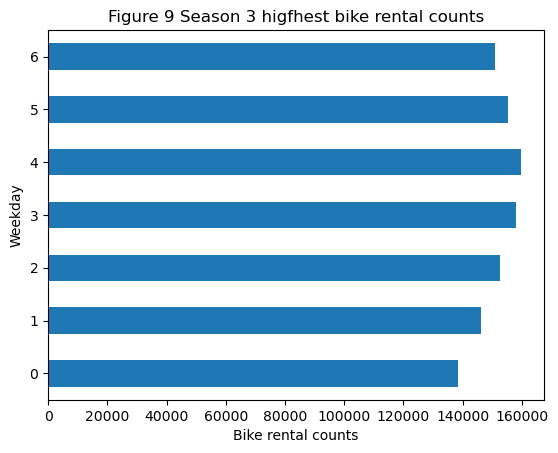

In [142]:
summer = days.loc[days["season"]==3]
summer_weekday_df = summer.groupby("weekday")["cnt"].sum().to_frame()

summer_plot = summer_weekday_df.plot.barh(legend=False)
summer_plot.set(title="Figure 9 Season 3 highest bike rental counts", xlabel="Bike rental counts", ylabel="Weekday")
